120.198226193
the lines which are above the threshold are 74
the lines which are above the threshold are 75
the lines which are above the threshold are 83
the lines which are above the threshold are 84
the lines which are above the threshold are 85
the lines which are above the threshold are 86
the lines which are above the threshold are 87
the lines which are above the threshold are 88
the lines which are above the threshold are 89
the lines which are above the threshold are 90
the lines which are above the threshold are 91
the lines which are above the threshold are 92
the lines which are above the threshold are 93
the lines which are above the threshold are 94
the lines which are above the threshold are 95
the lines which are above the threshold are 96
the lines which are above the threshold are 97
the lines which are above the threshold are 98
the lines which are above the threshold are 99
the lines which are above the threshold are 100
the lines which are above the threshold are 1

the lines which are above the threshold are 346
the lines which are above the threshold are 347
the lines which are above the threshold are 348
the lines which are above the threshold are 349
the lines which are above the threshold are 350
the lines which are above the threshold are 351
the lines which are above the threshold are 352
the lines which are above the threshold are 353
the lines which are above the threshold are 354
the lines which are above the threshold are 355
the lines which are above the threshold are 356
the lines which are above the threshold are 357
the lines which are above the threshold are 358
the lines which are above the threshold are 359
the lines which are above the threshold are 360
the lines which are above the threshold are 361
the lines which are above the threshold are 362
the lines which are above the threshold are 363
the lines which are above the threshold are 364
the lines which are above the threshold are 365
the lines which are above the threshold 

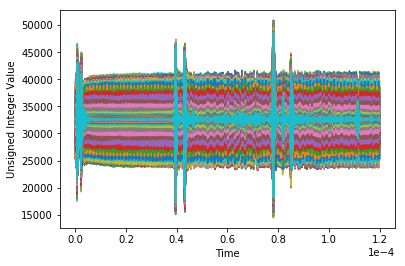

In [4]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#f = open('D:\study\Python\Lect_Notes\data\UltrasoundSampleSignal.dat','rb')
## open the UltrasoundSignal dat file
f = open('UltrasoundSampleSignal.dat','rb')
## Read the inputs of the file which is opened
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
## Arrange the 15000 samples with step size 125Mhz 
x=np.arange(0,15000/125e6,1/125e6)
## now we take the first line of the 15000 line 
FirstLine = AllSignal[:15000]
## The first line consist of dc component for which we have to remove them so taking the mean of the first line and subtracting the same 
dataFirstLine = FirstLine - np.mean(FirstLine)
## the length of the data FirstLine is taken when we want only positive peaks of the transform
L=len(dataFirstLine)
 ## We arrange the signal according to the given frequency
f=np.arange(0,125e6/2,125e6/15000)
## We have to change the signal into frequncy domain signal so we use fft transform
Y=np.fft.fft(dataFirstLine)
## To take only the positive peaks we take the absolute value and divide it by the length
PyyClean=abs(Y)/L
## To find the noise threshold we have to take the maximum amplitude of the positive peaks which comes to approx 120  
NoiseThreshold = max(PyyClean)
print(NoiseThreshold)
## we know that the total lines are 462
totalLines = np.arange(462)
## We have to initialize the variable Count_Of_Noisy Lines to zero 
Count_Of_Noisy_Lines=0
## Now for every line we find out peaks of all the lines 

for index in totalLines:
    ## Removing the DC component as done above
    Remove_DC_Component_From_Each_Line = AllSignal[index*15000:(index+1)*15000]-np.mean(AllSignal[index*15000:(index+1)*15000])
    ## The above process is repeated for all the lines 
    Length_Of_All_Lines = len(Remove_DC_Component_From_Each_Line)
    FFT_Of_Above_Signal = np.fft.fft(Remove_DC_Component_From_Each_Line)
    Positive_Peaks_Of_Signal = abs(FFT_Of_Above_Signal)/Length_Of_All_Lines
    Amplitude = max(Positive_Peaks_Of_Signal)
     ## comparing the amplitude with the maximum threshold of noise defined above
    if Amplitude > NoiseThreshold:
        ## We add a counter to find out the total number of lines 
        Count_Of_Noisy_Lines=Count_Of_Noisy_Lines+1
        ## we plot the frequency plot of the all the signals above the noise threshold 
        plt.plot(x,AllSignal[index*15000:(index+1)*15000])
        plt.xlabel('Time')
        plt.ylabel('Unsigned Integer Value')
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        print ("the lines which are above the threshold are " + str(index))
print "Total no of lines above the threshold are " + str(i)       
